# Projeto 3 - Classificação basica com duas dimensões
---

## Tratando os dados 
---

In [24]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()


,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [25]:
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
dados = dados.rename(columns = a_renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [26]:
troca = {
    0 : 1,
    1 : 0
}
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


## Vizualizando os dados em gráficos
---

<AxesSubplot: xlabel='horas_esperadas', ylabel='preco'>

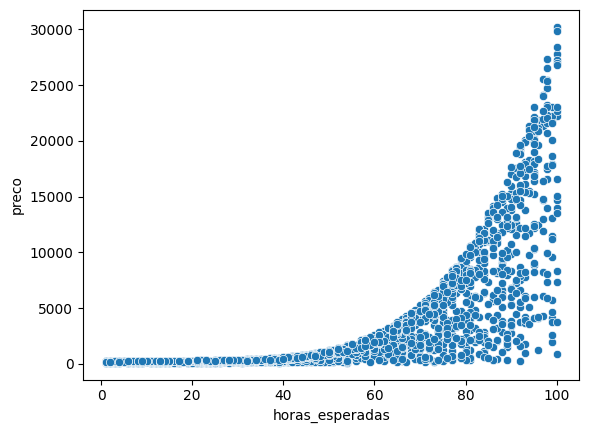

In [27]:
import seaborn as sns

sns.scatterplot(x="horas_esperadas", y="preco", data=dados)

<AxesSubplot: xlabel='horas_esperadas', ylabel='preco'>

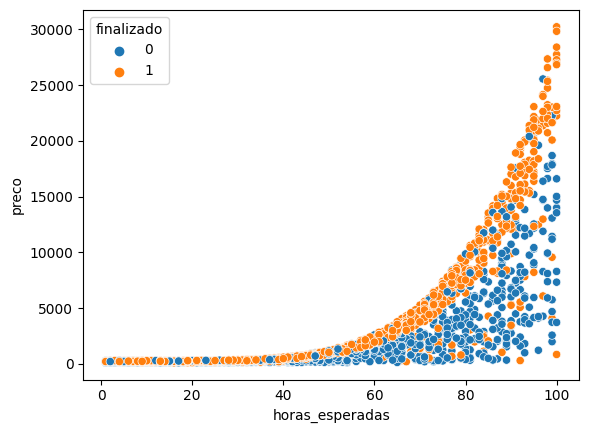

In [28]:
sns.scatterplot(x="horas_esperadas", y="preco", data=dados, hue="finalizado")

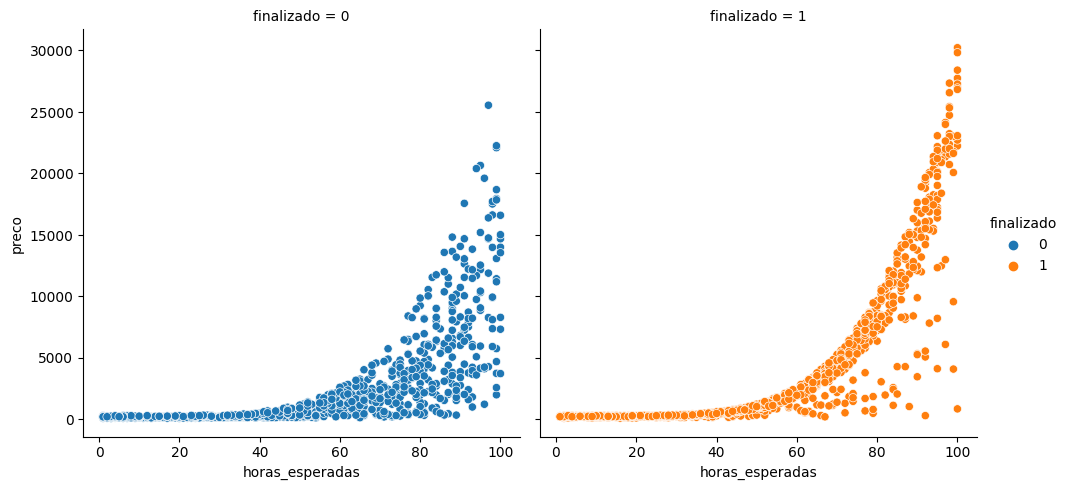

In [29]:
sns.relplot(x="horas_esperadas", y="preco", data=dados, hue="finalizado", col="finalizado")

## Criação, teste e validação da acurácia do Modelo
---

In [30]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [31]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

SEED =  5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        test_size=0.25,
                                                        stratify=y) # para que ele faça a proporção pelo eixo Y
print(f"treinaremos com {treino_x.shape[0]} elementos e testaremos com {teste_x.shape[0]} elementos")

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print(f'A acurácia foi de: {acuracia:.4f}')

treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi de: 0.4926


C:\Users\Lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Algoritmo de baseline
---

<font color="red"> obs: algoritmo de baseline seria a base que nosso modelo deveria ser capaz de ser melhor </font>

In [32]:
import numpy as np

previsoes_de_base = np.ones(540)

acuracia = accuracy_score(teste_y, previsoes_de_base)
print(f'A acurácia do algoritmo de baseline foi de: {acuracia:.4f}')

A acurácia do algoritmo de baseline foi de: 0.5259


<AxesSubplot: xlabel='horas_esperadas', ylabel='preco'>

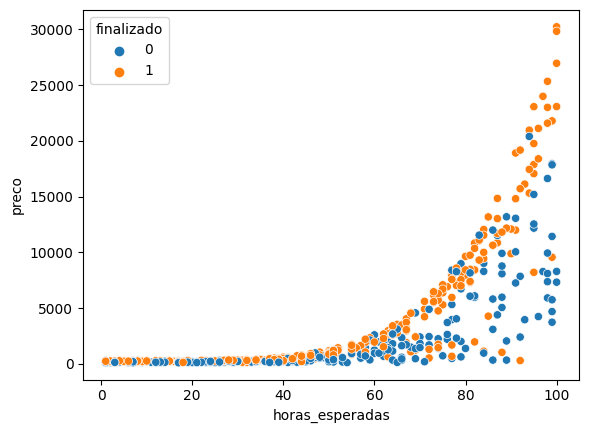

In [33]:
sns.scatterplot(x="horas_esperadas", y="preco", data=teste_x, hue=teste_y)

In [34]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()

y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

In [35]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [36]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [37]:
z = modelo.predict(pontos)
z = z.reshape(xx.shape)
z

C:\Users\Lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

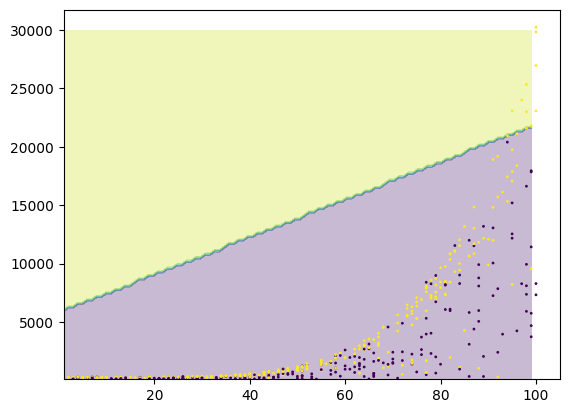

In [38]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

## Testando outro modelo SVM para treino
---

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

SEED =  5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        test_size=0.25,
                                                        stratify=y) # para que ele faça a proporção pelo eixo Y
print(f"treinaremos com {treino_x.shape[0]} elementos e testaremos com {teste_x.shape[0]} elementos")

modelo = SVC()
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print(f'A acurácia foi de: {acuracia:.4f}')

treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi de: 0.5519


C:\Users\Lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


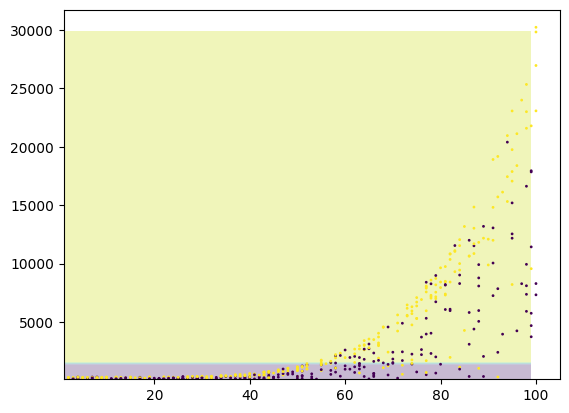

In [42]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()

y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

z = modelo.predict(pontos)
z = z.reshape(xx.shape)


import matplotlib.pyplot as plt

plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

## Preprocessamento dos dados e redimensionando dos valores
---


In [43]:
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

SEED =  5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        test_size=0.25,
                                                        stratify=y) # para que ele faça a proporção pelo eixo Y
print(f"treinaremos com {treino_x.shape[0]} elementos e testaremos com {teste_x.shape[0]} elementos")

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print(f'A acurácia foi de: {acuracia:.4f}')

treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi de: 0.6685


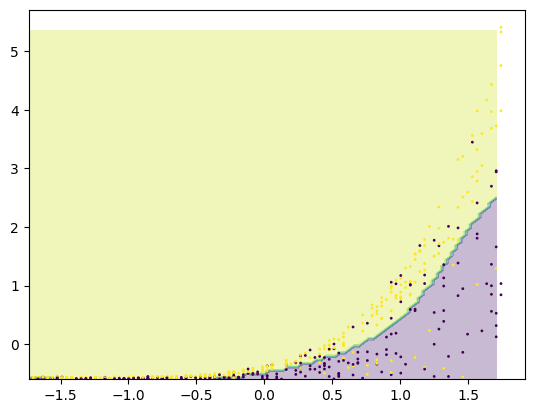

In [46]:
data_x = teste_x[:, 0]
data_y = teste_x[:, 1]
x_min = data_x.min()
x_max = data_x.max()

y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

z = modelo.predict(pontos)
z = z.reshape(xx.shape)


import matplotlib.pyplot as plt

plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)